In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test đã load được data hay chưa

In [3]:
df= pd.read_csv('./data/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()
print("\nCount of null values in each column",df.isnull().sum())
df = df.dropna(subset=['Customer ID'])
print("\nCount of null values in each column after cleaning",df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB

Count of null values in each column Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Count of null values in each column after cleaning Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Custo

In [5]:
df = df.dropna(subset=['Customer ID'])
df.shape


(824364, 8)

In [6]:
cancelled_orders = df[df['Invoice'].astype(str).str.startswith('C')]

num_cancelled_rows = len(cancelled_orders)
num_cancelled_invoices = cancelled_orders['Invoice'].nunique()

print(f"Số dòng bị huỷ (sản phẩm bị hoàn trả): {num_cancelled_rows}")
print(f"Số đơn hàng bị huỷ (Invoice duy nhất): {num_cancelled_invoices}")


Số dòng bị huỷ (sản phẩm bị hoàn trả): 18744
Số đơn hàng bị huỷ (Invoice duy nhất): 7901


In [7]:
df = df[~df.Invoice.str.contains('C',na=False)]


trên kaggle báo rằng InvoiceDate đang có kiểu dữ liệu là numeric
customerID đang dạng float -> string

In [8]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.3+ MB


In [9]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [11]:

# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",df.duplicated().sum())
df = df.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df.duplicated().sum())


Number of duplicates before cleaning: 26125
Number of duplicates after cleaning: 0


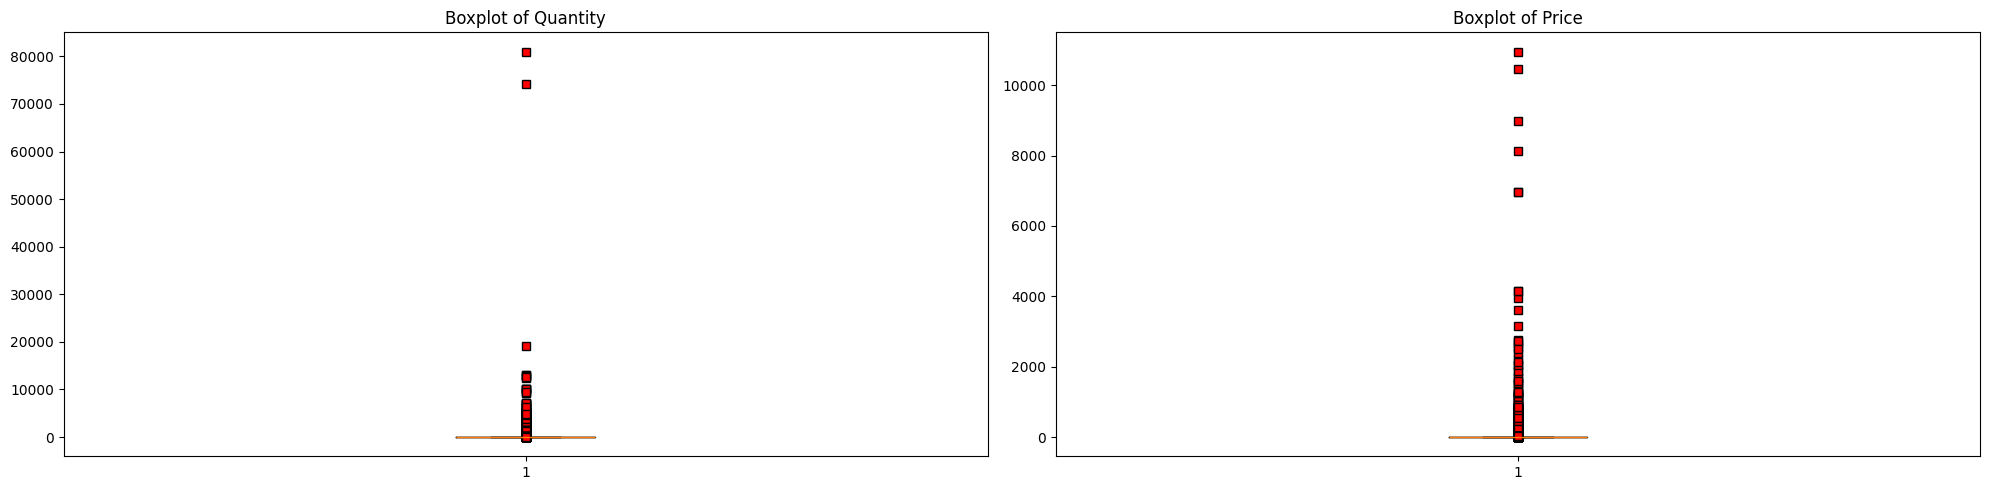

In [12]:

fig, ax = plt.subplots(1, 2, figsize=(20, 5))  # 1 hàng, 2 cột

# Boxplot cho Quantity
ax[0].boxplot(df['Quantity'], flierprops=dict(marker="s", markerfacecolor="red"), vert=0)
ax[0].set_title("Boxplot of Quantity")

# Boxplot cho Price
ax[1].boxplot(df['Price'], flierprops=dict(marker="s", markerfacecolor="red"), vert=0)
ax[1].set_title("Boxplot of Price")

plt.tight_layout()
plt.show()


In [ ]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit, lower_limit

def replace_with_threshold(dataframe, variable):
    upper_limit, lower_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] > upper_limit, variable] = upper_limit
    dataframe.loc[dataframe[variable] < lower_limit, variable] = lower_limit


replace_with_threshold(df, "Quantity")
replace_with_threshold(df, "Price")

C:\Users\dangth\AppData\Local\Temp\ipykernel_8560\1288273801.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '358.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[dataframe[variable] > upper_limit, variable] = upper_limit


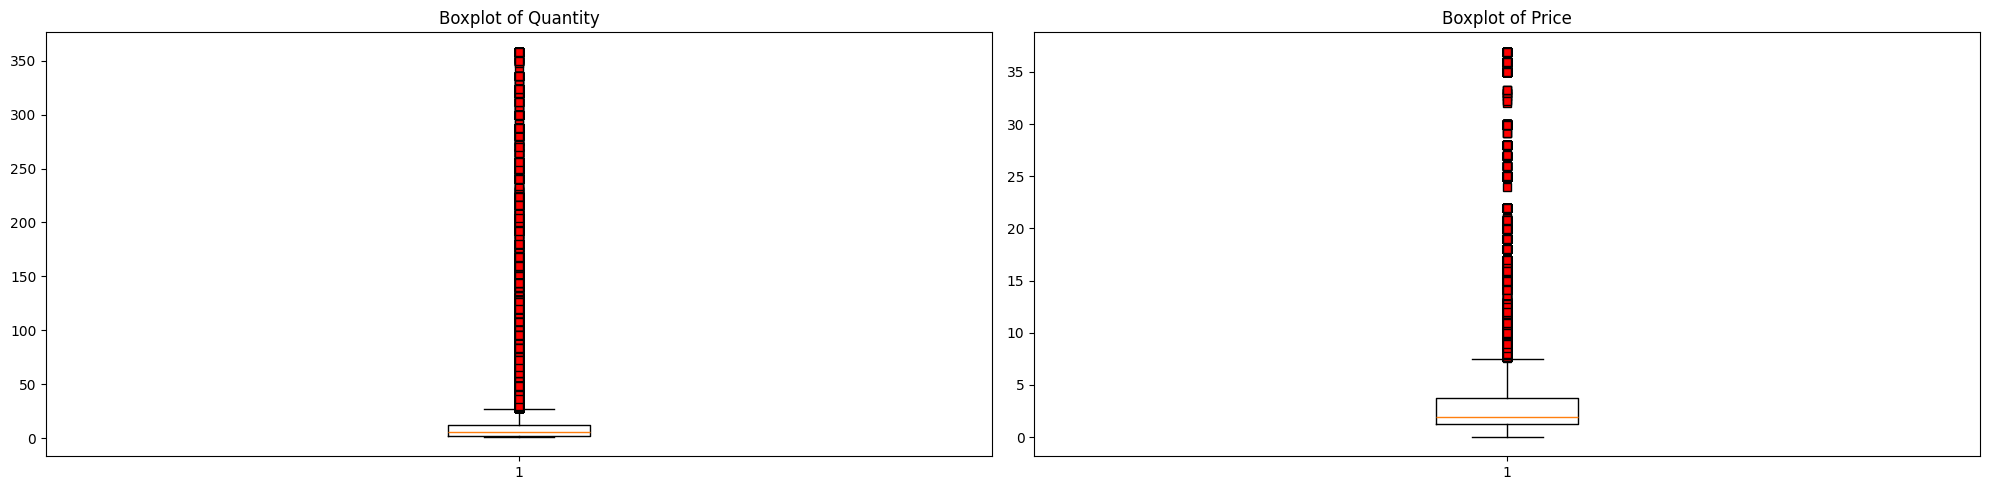

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))  # 1 hàng, 2 cột

# Boxplot cho Quantity
ax[0].boxplot(df['Quantity'], flierprops=dict(marker="s", markerfacecolor="red"), vert=0)
ax[0].set_title("Boxplot of Quantity")

# Boxplot cho Price
ax[1].boxplot(df['Price'], flierprops=dict(marker="s", markerfacecolor="red"), vert=0)
ax[1].set_title("Boxplot of Price")

plt.tight_layout()
plt.show()


Tukey’s Rule xử lý outlier thì mất quá nhiều dữ liệu cân nhắc cách khác

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779495 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  float64       
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  float64       
 7   Country      779495 non-null  object        
 8   TotalPrice   779495 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 59.5+ MB


-> Đã xử lý xong dữ liệu, sau khi xử lý mất 27% 

In [16]:
df.to_csv('./data/processed_data.csv', index=False)
